# Heterogeneous treatment effects

Example using Linear regression

# Import library and packages

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/daily_restaurant_sales.csv')
data.head()

,rest_id,day,month,weeday,weekend,is_holiday,is_dec,is_nov,competitors_price,discounts,sales
0,0,1/1/2016,1,4,False,True,False,False,2.88,0,79.0
1,0,1/2/2016,1,5,True,False,False,False,2.64,0,57.0
2,0,1/3/2016,1,6,True,False,False,False,2.08,5,294.0
3,0,1/4/2016,1,0,False,False,False,False,3.37,15,676.5
4,0,1/5/2016,1,1,False,False,False,False,3.79,0,66.0


In [3]:
data.describe()

,rest_id,month,weeday,competitors_price,discounts,sales
count,7679.00000,7679.000000,7679.000000,7679.000000,7679.00000,7679.000000
mean,3.00000,6.516864,3.000912,5.826608,10.28324,375.941334
std,2.00013,3.451664,2.001725,1.786338,9.70930,331.953960
min,0.00000,1.000000,0.000000,1.350000,0.00000,16.000000
25%,1.00000,4.000000,1.000000,4.480000,0.00000,71.000000
50%,3.00000,7.000000,3.000000,5.700000,10.00000,283.000000
75%,5.00000,10.000000,5.000000,7.120000,15.00000,551.000000
max,6.00000,12.000000,6.000000,9.970000,45.00000,2265.000000


<AxesSubplot:xlabel='month', ylabel='sales'>

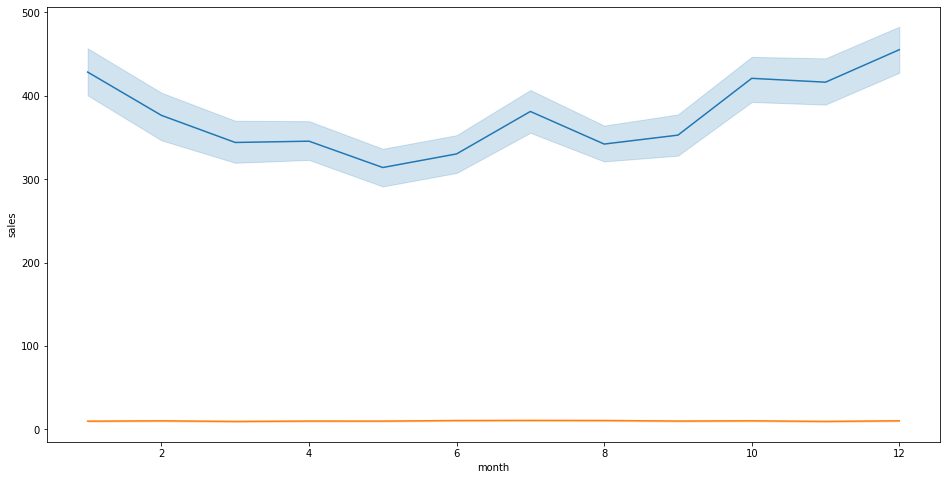

In [4]:
plt.figure(figsize=(16,8))
sns.lineplot(x = 'month', y = 'sales', data = data)
sns.lineplot(x = 'month', y = 'discounts', data = data)

# model for CATE

## Simple linear model

In [5]:
import statsmodels.formula.api as smf

X = ["C(month)", "C(weeday)", "is_holiday", "competitors_price"]

regr_cate = smf.ols(f"sales ~ discounts*({'+'.join(X)})", data=data).fit()

In [6]:
regr_cate.params[-5:]

discounts:C(weeday)[T.5]        3.113530
discounts:C(weeday)[T.6]        0.211166
discounts:is_holiday[T.True]    2.252893
competitors_price               0.938802
discounts:competitors_price    -3.209731
dtype: float64

### Predicting CATE

In [55]:
ols_cate_pred = (regr_cate.predict(data.assign(discounts=data["discounts"]+1)) 
                         -regr_cate.predict(data))

In [56]:
ols_cate_pred_2 = (regr_cate.predict(data.assign(discounts=data["discounts"]+1e-8)) 
                         -regr_cate.predict(data))/(1e-8)

In [8]:
ols_cate_pred

0       53.302535
1       48.652492
2       47.547577
3       43.195858
4       42.108752
          ...    
7674    42.197410
7675    28.919270
7676    38.855831
7677    33.862166
7678    26.322954
Length: 7679, dtype: float64

In [68]:
ols_cate_pred_2

0       53.302536
1       48.652492
2       47.547582
3       43.195860
4       42.108752
          ...    
7674    42.197416
7675    28.919266
7676    38.855836
7677    33.862165
7678    26.322954
Length: 7679, dtype: float64

In [9]:
data2 = (data
         .assign(pred_linear_cate = ols_cate_pred)
         )

data2.head()

,rest_id,day,month,weeday,weekend,is_holiday,is_dec,is_nov,competitors_price,discounts,sales,pred_linear_cate
0,0,1/1/2016,1,4,False,True,False,False,2.88,0,79.0,53.302535
1,0,1/2/2016,1,5,True,False,False,False,2.64,0,57.0,48.652492
2,0,1/3/2016,1,6,True,False,False,False,2.08,5,294.0,47.547577
3,0,1/4/2016,1,0,False,False,False,False,3.37,15,676.5,43.195858
4,0,1/5/2016,1,1,False,False,False,False,3.79,0,66.0,42.108752


<AxesSubplot:ylabel='Density'>

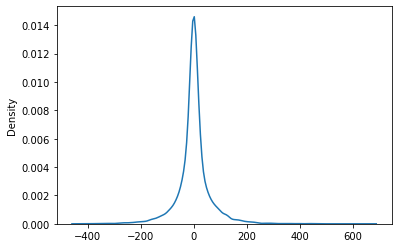

In [10]:
sns.kdeplot(regr_cate.resid)

# Model with non_linear terms

In [134]:
nlr_regr_model = smf.ols(f"sales ~ np.log(discounts+1)*({'+'.join(X)})", data=data).fit()

<AxesSubplot:ylabel='Density'>

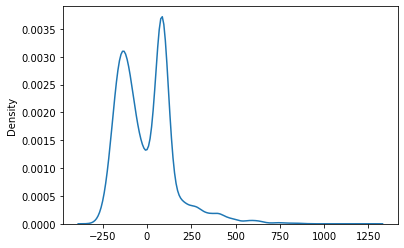

In [135]:
sns.kdeplot(nlr_regr_model.resid)

In [136]:
nlr_ols_cate_pred = (nlr_regr_model.predict(data.assign(discounts=data["discounts"]+0.00001))
                         -nlr_regr_model.predict(data))/(0.00001)

In [137]:
nlr_ols_cate_pred

0       360.230514
1       331.858823
2        54.217970
3        18.567618
4       287.351463
           ...    
7674     18.676303
7675     33.829267
7676     25.146736
7677     22.156885
7678     10.493458
Length: 7679, dtype: float64

In [138]:
data3 = (data
         .assign(pred_linear_cate = nlr_ols_cate_pred)
         )

data3.head()

,rest_id,day,month,weeday,weekend,is_holiday,is_dec,is_nov,competitors_price,discounts,sales,pred_linear_cate
0,0,1/1/2016,1,4,False,True,False,False,2.88,0,79.0,360.230514
1,0,1/2/2016,1,5,True,False,False,False,2.64,0,57.0,331.858823
2,0,1/3/2016,1,6,True,False,False,False,2.08,5,294.0,54.217970
3,0,1/4/2016,1,0,False,False,False,False,3.37,15,676.5,18.567618
4,0,1/5/2016,1,1,False,False,False,False,3.79,0,66.0,287.351463


# $\hat{\beta} = \frac{\sum{(t_i - \bar{t})*(y_i - \bar{y})}}{\sum{(t_i - \bar{t})^2}}$